In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [53]:
x = np.arange(0,100)
y = (np.sin(x)+1)*10+2*x+np.random.rand(100)*5

points = 12
names = []
for i in range(points):
  names.append("a"+str(i))
ds = []
target = []
for i in range(points,len(x)-1):
  ds.append(y[i-points:i])
  target.append(y[i]) 
df = pd.DataFrame(np.array(ds),columns=names) 
dfy = df 
dfy["target"] = target

In [54]:
df.tail(5)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,target
82,179.167632,189.952124,189.478918,180.909726,174.804283,180.666270,186.747373,198.434525,203.046231,197.252503,187.520572,189.242671,196.322860
83,189.952124,189.478918,180.909726,174.804283,180.666270,186.747373,198.434525,203.046231,197.252503,187.520572,189.242671,196.322860,210.150859
84,189.478918,180.909726,174.804283,180.666270,186.747373,198.434525,203.046231,197.252503,187.520572,189.242671,196.322860,210.150859,214.225910
85,180.909726,174.804283,180.666270,186.747373,198.434525,203.046231,197.252503,187.520572,189.242671,196.322860,210.150859,214.225910,211.672189
86,174.804283,180.666270,186.747373,198.434525,203.046231,197.252503,187.520572,189.242671,196.322860,210.150859,214.225910,211.672189,201.571828


In [55]:
y[:15]

array([11.77975906, 24.86793753, 25.20955005, 19.85430272, 10.93575219,
       12.32750283, 19.76591005, 35.35522323, 36.40381778, 33.48859723,
       27.38242015, 22.48566519, 29.50363879, 44.71767089, 48.82147602])

In [56]:
dfy["a0"].head(10)

0    11.779759
1    24.867938
2    25.209550
3    19.854303
4    10.935752
5    12.327503
6    19.765910
7    35.355223
8    36.403818
9    33.488597
Name: a0, dtype: float64

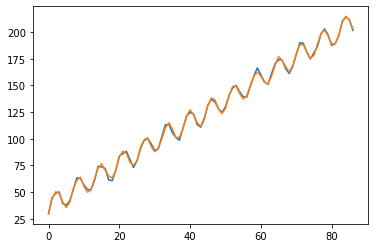

In [57]:
model = LinearRegression()
model.fit(dfy[names],dfy["target"])
plt.plot(np.arange(len(df)),df["target"])
plt.plot(np.arange(len(df)),model.predict(dfy[names]))

In [58]:
last = dfy.iloc[-1]
prediction = []
n = []
for i in range(points-1):
  n.append(last["a"+str(i+1)])
n.append(last["target"])
n.append(model.predict(np.array(n).reshape(1,-1))[0])
prediction.append(n[-1])
for i in range(100):
  n = n[1:]
  n.append(model.predict(np.array(n).reshape(1,-1))[0])
  prediction.append(n[-1])

203.3071172271845

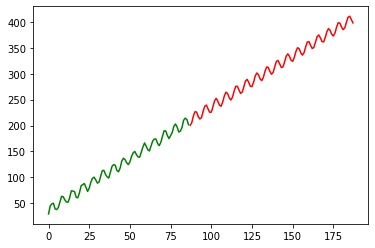

In [59]:
plt.plot(np.arange(len(dfy)),dfy["target"],c="green")
plt.plot(np.arange(len(dfy),len(dfy)+len(prediction)),prediction,c="red")